In [1]:
import sys
sys.path.insert(1, '../../../cell2cell/')
import cell2cell as c2c
from cell2cell.tensor.tensor import BaseTensor

sys.path.insert(1, '../../../scripts/')
from simulation.simulate import Simulate, CCI_MD
# specify path to save figures
fig_path = ''
data_path = ''

/home/hratch/anaconda3/envs/cci_dt/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


# Generate Simulated Tensor

In [2]:
# init
sim = Simulate() 

# simulate a scale_free randomly connected ligand-receptor network (potential interactions)
sim.LR_network(network_type = 'scale-free', **{'nodes': 100, 'degrees': 3, 'alpha': 2}) #scale-free

# LR metadata
sim.LR.generate_metadata(n_LR_cats = {3: 0}, cat_skew = 0)

# generate cell metadata, accounting for directionality (senders vs receivers) and 
# allowing for autocrine interactions 
cci = CCI_MD()
cci.cci_network(n_cells = 50, directional = True, autocrine = True)

# generate 1 metadata categories, with 3 subcategories and 0 skew, the overall skew of categories is 0
# do not remove homotypic interactions (will be included)
cci.generate_metadata(n_cell_cats = {3: 0}, cat_skew = 0, remove_homotypic = 0)
# add cell metadata to simulation object
sim.cci = cci

# generate n_patter metadata groups of CC-LR pairs that change across n_conditions
# these changes can either be linear, oscillating, or a pulse; allow homotypic interactions to form patterns
# maximize the possible change in communication score
sim.generate_tensor_md(n_patterns = 4, n_conditions = 12, patterns = ['pulse', 'linear', 'oscillate', 'power'], 
                      consider_homotypic = True, score_change = 'max')

#generate a tensor with continuous LR scores and baseline noise; keep single-cells 
sim.generate_tensor(noise = 0.05, binary = False, bulk = True, noise_max = None)

# format the tensor to be input to tensor-cell2cell
sim.reshape()

/home/hratch/Projects/cci_dt/notebooks/simulation/other_analyses/tmpmzr27tpd_bipartite_sf.csv
Generate undirected, bipartite, scale-free graph
Check network properties
All properties are as expected


../../../scripts/simulation/graphs.py:164: UserWarning: 61 nodes are disconnected, removing from network
  warnings.warn(mssg)
/home/hratch/anaconda3/envs/cci_dt/lib/python3.9/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)
../../../scripts/simulation/simulate.py:648: UserWarning: Only continuous scoring is currently implemented
  warnings.warn('Only continuous scoring is currently implemented')
../../../scripts/simulation/simulate.py:698: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a dif

Generate reshaped tensor


100%|██████████| 12/12 [00:01<00:00, 11.98it/s]


In [6]:
tensor = BaseTensor()
t1 = sim.sim_tensor.tensor_cci
tensor.tensor = t1
tensor.order_names = [['Context-{}'.format(c+1) for c in range(t1.shape[0])],
                      ['LR-{}'.format(c+1) for c in range(t1.shape[1])],
                      ['Sender-{}'.format(c+1) for c in range(t1.shape[2])],
                      ['Receiver-{}'.format(c+1) for c in range(t1.shape[3])]
                     ]

  0%|          | 0/5 [00:00<?, ?it/s]

(<Figure size 288x162 with 1 Axes>,
 [(1, 0.5776763637370603),
  (2, 0.2756666128530637),
  (3, 0.19485801287842405),
  (4, 0.07046993152061953),
  (5, 0.05954831734755845)])

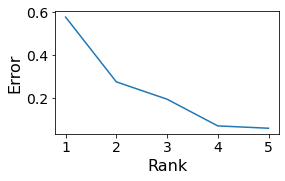

In [7]:
tensor.elbow_rank_selection(5)

In [10]:
tensor.compute_tensor_factorization(rank=r)

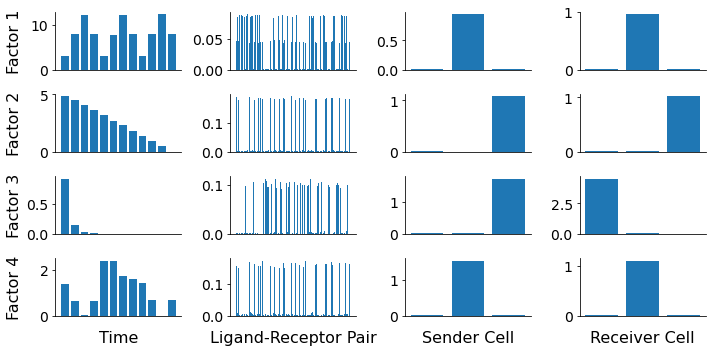

In [30]:
version = #2
fig, axes = c2c.plotting.tensor_factors_plot(interaction_tensor=tensor,
                                             order_labels=['Time', 'Ligand-Receptor Pair', 'Sender Cell', 'Receiver Cell'],
                                             #metadata = tensor.order_names,
                                             #sample_col='Order',
                                             #group_col='Element',
                                             #meta_cmaps=['viridis', 'tab20', 'Pastel1', 'Pastel1'],
                                             fontsize=14,
                                             filename=fig_path + 'TF_SIM_v' + str(version) + '.svg'
                                            )

In [37]:
version = 1
data_path = ''
import pickle
with open(data_path + 'sim_obj_v' + str(version) + '.pickle', 'wb') as f:
    pickle.dump(sim, f)

In [26]:
sim.clrm.loc[:,['cell_subcat', 'LR_subcat', 'change', 'pattern', '0']]

,cell_subcat,LR_subcat,change,pattern,0
0,"(561ddae80d36, 561ddae80d36)",93f61ac665f9,0.75,oscillate,0.25
1,"(561ddae80d36, 561ddae80d36)",18232f0ba2ea,0.50,pulse,0.50
2,"(dfba567e03f7, 4fdda2194966)",00e8b5e0bb94,-0.75,power,0.75
3,"(dfba567e03f7, dfba567e03f7)",18232f0ba2ea,-1.00,linear,1.00
